In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import random
np.random.seed(1001)
random.seed(1001)

# Create parameters

In [3]:
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution with limited memory $m$

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 150
memory = [20, 30, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 20
k=0, rel_gap=inf, L=-2472.706641209428, U=3936.4781972599376, L0=-2472.706641209428
k=10, rel_gap=inf, L=-385.28503319299557, U=2.08903090403669, L0=-385.28503319299557
k=20, rel_gap=0.7709173491537121, L=-171.52239062930812, U=-96.85510772779736, L0=-171.52239062930812
rho=117.59802709653134


/var/folders/13/wyn3w3nx7ks002_qzk18rz7h0000gn/T/ipykernel_18816/3948482844.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')


k=30, rel_gap=0.35018986454208983, L=-138.71354377746002, U=-102.7363242905871, L0=-139.71084287142048
k=40, rel_gap=0.3074612741897784, L=-138.07062835370107, U=-105.60207868432826, L0=-138.79569331238872
k=50, rel_gap=0.20089630650888388, L=-131.07594831814185, U=-109.14843155708564, L0=-132.15153193816877
k=60, rel_gap=0.05757100567960806, L=-117.65254164194084, U=-111.24788880377434, L0=-144.9230640302576
k=70, rel_gap=0.052034212004766496, L=-117.65254164194084, U=-111.83337984583318, L0=-118.21589573692108
k=80, rel_gap=0.024780686309048828, L=-115.00855512592898, U=-112.22748112101442, L0=-116.79077043292
k=90, rel_gap=0.024476909741120555, L=-115.00855512592898, U=-112.26075866852966, L0=-129.97362078924107
k=100, rel_gap=0.024476909741120555, L=-115.00855512592898, U=-112.26075866852966, L0=-141.70394428172312
k=110, rel_gap=0.024343812460738783, L=-115.00855512592898, U=-112.27534517892843, L0=-115.7741992675974
k=120, rel_gap=0.019751101527432056, L=-114.59285790669765, U=-1

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=140, rel_gap=0.0009587832712987571, L=-112.66631311976198, U=-112.55839401453659, L0=-118.6272810557457
rel_gap=0.0009587832712987571, L=-112.66631311976198, U=-112.55839401453659
memory = 50
k=0, rel_gap=inf, L=-2472.706641209428, U=3936.4781972599376, L0=-2472.706641209428
k=10, rel_gap=inf, L=-385.28503319299557, U=2.08903090403669, L0=-385.28503319299557
k=20, rel_gap=0.7709173491558531, L=-171.52239062951548, U=-96.85510772779736, L0=-171.52239062951548
rho=117.59802709653134
k=30, rel_gap=0.34317579892375843, L=-137.2332104112361, U=-102.17069911563061, L0=-137.2332104112361
k=40, rel_gap=0.13925722988855516, L=-121.81936080037053, U=-106.9287581455921, L0=-121.81936080037053
k=50, rel_gap=0.05324178590640945, L=-116.47192756245977, U=-110.5842258833523, L0=-116.47192756245977
k=60, rel_gap=0.03802046886342137, L=-115.3098466339477, U=-111.08629366452283, L0=-115.3098466339477
k=70, rel_gap=0.01728587607613689, L=-113.94506561208891, U=-112.00889375521115, L0=-113.9450656120889

# Centralized solution

In [6]:
h_cvx = ob.cvx_supply_chain(params=params)[0]
print(f"{h_cvx=}")

h_cvx=-112.56431835964304


# Plot

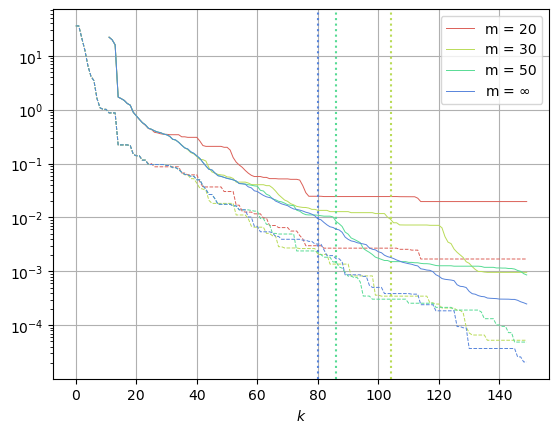

In [7]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='sc_fin_memory_agg.pdf')